## Тестовое исследование Tinkoff

### Цели и задачи:

Проанализировать базу данных: найти тренды, зоны роста, аномалии и так далее. Предоставить выводы.

### Описание данных

Данные представлены в виде 10 витрин, итоговая таблица получена путем составления одной общей таблицы из витрин при помощи SQL-запроса. 

Описание витрин: 
  - task - Каждая запись в task это задание совершить коммуникацию с потенциальным клиентом для продажи продукта (т.е. task=клиент);
  - call - Каждая запись в call это коммуникация с потенциальным клиентом;
  - action - Результат коммуникации с клиентом;
  - product - содержит информацию начал ли клиент пользоваться услугами;
  - emp_x_org_gr - содержит  информацию об операторе;
  - result - содержит информацию о статусе коммуникации;
  - queue - содержит информацию об очереди, на которое получено задание;
  - group - содержит информацию о группе, в которой работает оператор;
  - mngmnt - содержит управленческую информацию, в которой работает оператор;
  - horoscope - содержит информацию о знаке зодиакка оператора;

### Расширенное описание данных

После объединения в итоговую таблицу вошли следующие поля:

  - org_management_rk - Ключ управления, в которой работает оператор;
  - management_nm - Расшифровка ключа управления, в которой работает оператор;
  - group_nm - Расшифровка ключа группы, в которой работает оператор;
  - org_group_rk - Ключ группы, в которой работает оператор;
  - wo_hit_rk - Ключ коммуникации с клиентом;
  - wo_task_rk - Ключ задания;
  - wo_employee_rk - Ключ оператора;
  - wo_queue_id - Идентификтор очереди, на которой получено задание;
  - agent_login - Логин оператора;
  - finish_communication_dttm - Дата-время завершения коммуникации;
  - duratoin_sec - Длительность коммуникации в секундах;
  - task_stage_id - Идентификтор стадии задания;
  - source_system_cd - Код системы источника;
  - create_exercise_dttm - Дата-время создания задания;
  - finish_exercise_dttm - Дата-время окончания задания;
  - queue_desc - Расшифровка идентификтора очереди, на которое получено задание;
  - horoscope - Знак зодиака оператора;
  - hid - Идентификатор продукта;
  - using_flg - Флаг начала пользования продуктом;
  - hit_status_result_id - Идентификтор результата коммуникации;
  - hit_status_result_desc - Расшифровка идентификтора результата коммуникации;



## Вызов библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
import warnings

warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('C:/Users/r0yja/Desktop/tinkoff_test/tables_3.csv')

In [4]:
df[:5]

,org_management_rk,management_nm,group_nm,org_group_rk,wo_hit_rk,wo_task_rk,wo_employee_rk,wo_queue_id,agent_login,finish_communication_dttm,...,task_stage_id,source_system_cd,create_exercise_dttm,finish_exercise_dttm,queue_desc,horoscope,hid,using_flg,hit_status_result_id,hit_status_result_desc
0,401,Управление КЦ Дирис,Группа 13,252,245340,99451448,319003,13042,0628aaku,2022-08-10 14:51:54,...,23.0,FW,2022-08-08 04:03:34,2022-08-10 14:51:54,Очередь 72,Дева,4,NaN,1,"Дозвон, Отказ"
1,401,Управление КЦ Дирис,Группа 13,252,2032334,2645056,319003,13779,0628aaku,2022-08-11 10:40:39,...,23.0,FW,2022-08-11 03:31:41,2022-08-11 10:40:39,Очередь 19,Дева,4,NaN,1,"Дозвон, Отказ"
2,401,Управление КЦ Дирис,Группа 13,252,2160074,3343180,319003,13045,0628aaku,2022-08-11 15:50:27,...,23.0,FW,2022-08-11 03:13:18,2022-08-12 14:59:25,Очередь 29,Дева,4,NaN,5,Недозвон
3,401,Управление КЦ Дирис,Группа 13,252,2568171,2429416,319003,13042,0628aaku,2022-08-11 13:04:47,...,23.0,FW,2022-08-10 04:01:55,2022-08-11 13:04:47,Очередь 72,Дева,4,NaN,1,"Дозвон, Отказ"
4,401,Управление КЦ Дирис,Группа 13,252,3233691,2946463,319003,13045,0628aaku,2022-08-11 14:32:49,...,23.0,FW,2022-08-11 03:04:14,2022-08-12 14:29:19,Очередь 29,Дева,4,NaN,5,Недозвон


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89174 entries, 0 to 89173
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   org_management_rk          89174 non-null  int64  
 1   management_nm              89174 non-null  object 
 2   group_nm                   89174 non-null  object 
 3   org_group_rk               89174 non-null  int64  
 4   wo_hit_rk                  89174 non-null  int64  
 5   wo_task_rk                 89174 non-null  int64  
 6   wo_employee_rk             89174 non-null  int64  
 7   wo_queue_id                89174 non-null  int64  
 8   agent_login                89174 non-null  object 
 9   finish_communication_dttm  89174 non-null  object 
 10  duratoin_sec               89174 non-null  object 
 11  task_stage_id              85383 non-null  float64
 12  source_system_cd           89174 non-null  object 
 13  create_exercise_dttm       89174 non-null  obj

In [6]:
df = df.dropna(subset = 'queue_desc')

Сразу стоит привести столбцы с датой к формату datetime, а также проверить на дубли.

In [7]:
df.duplicated().sum()

0

In [8]:
df['finish_communication_dttm'] = pd.to_datetime(df['finish_communication_dttm'], format='%Y.%m.%d %H:%M:%S')
df['create_exercise_dttm'] = pd.to_datetime(df['create_exercise_dttm'], format='%Y.%m.%d %H:%M:%S')
df['finish_exercise_dttm'] = pd.to_datetime(df['finish_exercise_dttm'], format='%Y.%m.%d %H:%M:%S')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89172 entries, 0 to 89173
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   org_management_rk          89172 non-null  int64         
 1   management_nm              89172 non-null  object        
 2   group_nm                   89172 non-null  object        
 3   org_group_rk               89172 non-null  int64         
 4   wo_hit_rk                  89172 non-null  int64         
 5   wo_task_rk                 89172 non-null  int64         
 6   wo_employee_rk             89172 non-null  int64         
 7   wo_queue_id                89172 non-null  int64         
 8   agent_login                89172 non-null  object        
 9   finish_communication_dttm  89172 non-null  datetime64[ns]
 10  duratoin_sec               89172 non-null  object        
 11  task_stage_id              85381 non-null  float64       
 12  sour

В таблице в двух столбцах присутствуют пропуски посмотрим на них

In [10]:
df.task_stage_id.value_counts()

1.0     72896
23.0    11727
6.0       252
17.0      222
3.0       222
18.0       42
4.0        15
16.0        3
20.0        2
Name: task_stage_id, dtype: int64

Всего 9 разных стадий со своими индентификаторами, однако присутствуют пропуски, заменим их на 'unknown'

In [11]:
df.task_stage_id = df.task_stage_id.fillna('unknown')

In [12]:
df.using_flg.value_counts()

1.0    1534
0.0     991
Name: using_flg, dtype: int64

In [13]:
df_pos = df[df.hit_status_result_desc == 'Дозвон, Успешно']
df_pos[:5]

,org_management_rk,management_nm,group_nm,org_group_rk,wo_hit_rk,wo_task_rk,wo_employee_rk,wo_queue_id,agent_login,finish_communication_dttm,...,task_stage_id,source_system_cd,create_exercise_dttm,finish_exercise_dttm,queue_desc,horoscope,hid,using_flg,hit_status_result_id,hit_status_result_desc
8,401,Управление КЦ Дирис,Группа 13,252,5480829,3455742,319003,13045,0628aaku,2022-08-12 09:28:33,...,23.0,FW,2022-08-12 03:13:26,2022-08-12 09:28:33,Очередь 29,Дева,4,0.0,3,"Дозвон, Успешно"
9,401,Управление КЦ Дирис,Группа 13,252,11249606,4305029,319003,12697,0628aaku,2022-08-15 09:13:22,...,23.0,FW,2022-08-13 03:05:44,2022-08-15 09:13:22,Очередь 83,Дева,4,0.0,3,"Дозвон, Успешно"
10,401,Управление КЦ Дирис,Группа 13,252,11453027,5701664,319003,13045,0628aaku,2022-08-15 09:38:34,...,23.0,FW,2022-08-15 03:16:06,2022-08-15 09:38:34,Очередь 29,Дева,4,1.0,3,"Дозвон, Успешно"
53,401,Управление КЦ Дирис,Группа 13,252,24308690,6141741,1971030,8159,novaaaka,2022-08-19 12:14:29,...,unknown,CM,2022-08-15 05:08:40,2022-08-19 12:14:29,Очередь 22,Рак,2,1.0,3,"Дозвон, Успешно"
83,401,Управление КЦ Дирис,Группа 13,252,96244382,99919716,1971030,14110,novaaaka,2022-08-09 15:11:55,...,unknown,CM,2022-08-08 18:20:58,2022-08-09 15:11:55,Очередь 28,Рак,4,1.0,3,"Дозвон, Успешно"


Практически все значения, которые есть в столбце 'using_flg', относятся к статусу 'Дозвон, Успешно', остально можно поменять на 'unknown'

In [14]:
df.using_flg  = df.using_flg .fillna('unknown')
df_pos = df[df.hit_status_result_desc == 'Дозвон, Успешно']

## Графический анализ данных

In [15]:
df_pos_rate = df.groupby('hit_status_result_desc').agg({'wo_task_rk' : 'count'}) \
                                                  .sort_values(by = 'wo_task_rk', ascending = False)

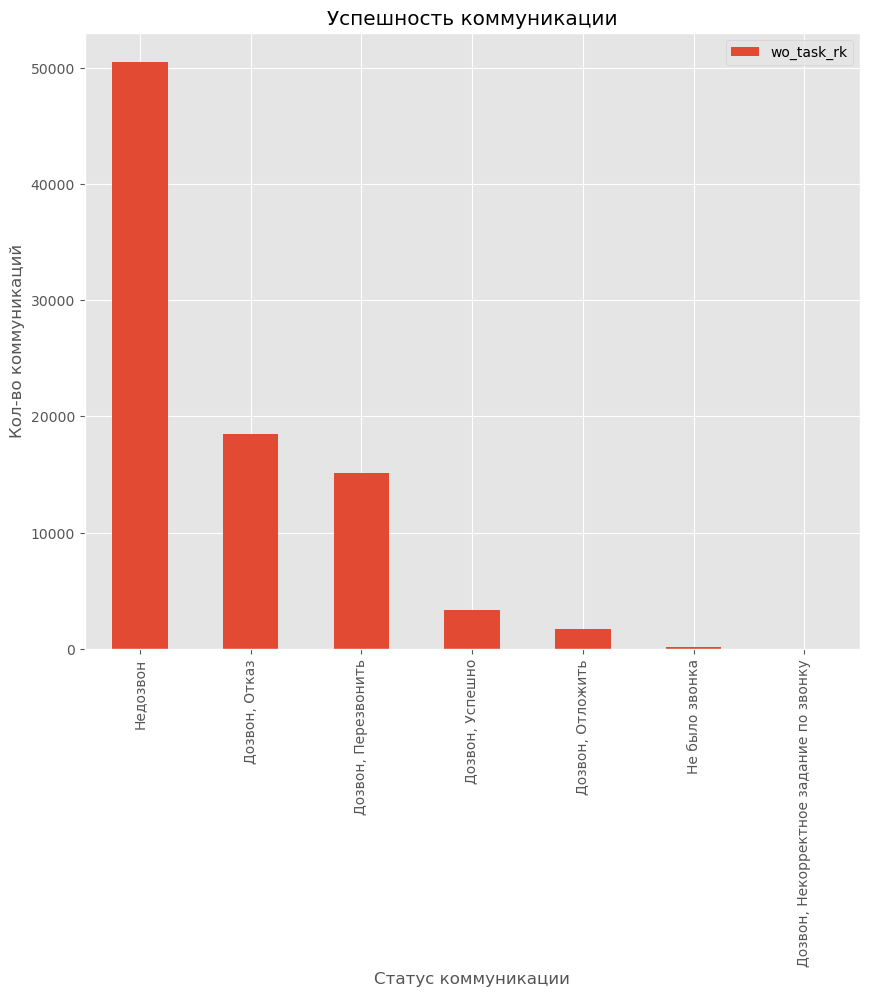

,wo_task_rk
hit_status_result_desc,
Недозвон,50461
"Дозвон, Отказ",18458
"Дозвон, Перезвонить",15107
"Дозвон, Успешно",3310
"Дозвон, Отложить",1680
Не было звонка,130
"Дозвон, Некорректное задание по звонку",26


In [16]:
plt.style.use('ggplot')

df_pos_rate.plot(kind='bar', figsize=(10,8))

plt.title('Успешность коммуникации')
plt.xlabel('Статус коммуникации')
plt.ylabel('Кол-во коммуникаций')
plt.show()
df_pos_rate

Графическое распределение статуса успешности коммуникаций, как видно из распределения более 50% - недозвон, отказ и просьба перезвонить примерно в равных долях, успешность всего около 3,7% от всех звонков.

Теперь посмотрим на распределение успешности коммуникаций, начал ли клиент пользоваться услугой после успешной коммуникации

In [17]:
df_pos.using_flg = df_pos.using_flg.replace(to_replace=[0, 1], value=['refusal','successfully'])

In [18]:
df_pos.using_flg.unique()

array(['refusal', 'successfully', 'unknown'], dtype=object)

In [19]:
df_pos_flg = df_pos.groupby('using_flg').agg({'wo_task_rk' : 'count'}) \
                                                  .sort_values(by = 'wo_task_rk', ascending = False)

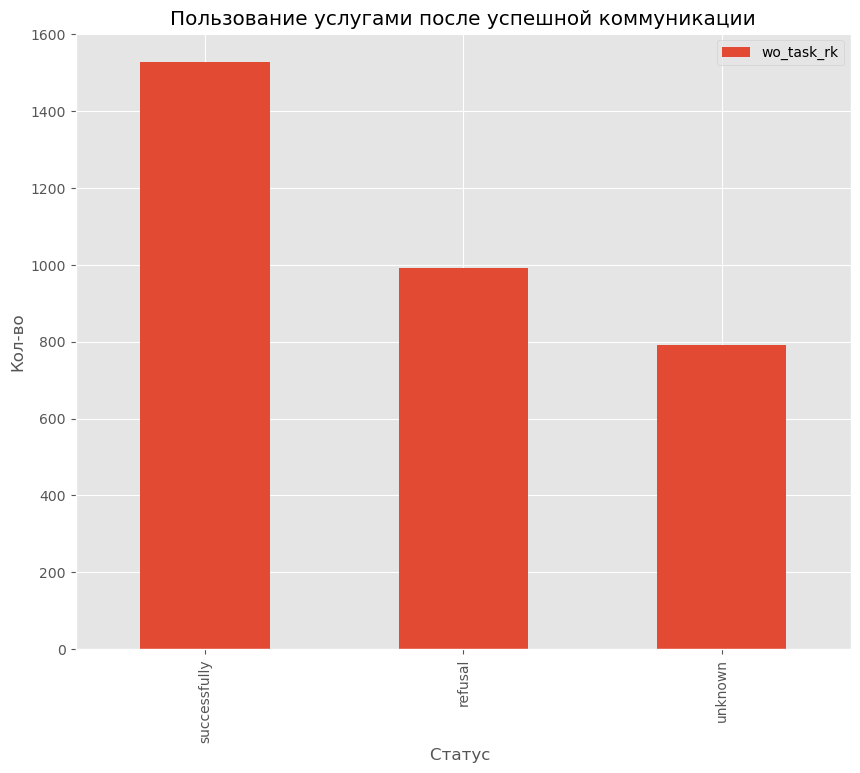

,wo_task_rk
using_flg,
successfully,1527
refusal,991
unknown,792


In [20]:
df_pos_flg.plot(kind='bar', figsize=(10,8))

plt.title('Пользование услугами после успешной коммуникации')
plt.xlabel('Статус ')
plt.ylabel('Кол-во')
plt.show()
df_pos_flg

По распределению видно, что порядка 50% клиентов после успешного звонка начинают пользоваться услугами.

На основе графиков выше можно сделать вывод:
  - примерно 4 успешных коммуникации приходяться на 100 совершенных, из которых всего 2 воспользуются услугами

### Продолжительность звонков

Рассмотрим продолжительность звонков и их влияние на успешность

Для начала изменим тип данных, т.к. при простой смене данных нам будет выдавать ошибку, сначала в столбце нужно будет заменить все ',' на '.'

In [21]:
df['duratoin_sec'] = df['duratoin_sec'].str.replace(',', '.')

In [22]:
df['duratoin_sec'] = df['duratoin_sec'].astype('float')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89172 entries, 0 to 89173
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   org_management_rk          89172 non-null  int64         
 1   management_nm              89172 non-null  object        
 2   group_nm                   89172 non-null  object        
 3   org_group_rk               89172 non-null  int64         
 4   wo_hit_rk                  89172 non-null  int64         
 5   wo_task_rk                 89172 non-null  int64         
 6   wo_employee_rk             89172 non-null  int64         
 7   wo_queue_id                89172 non-null  int64         
 8   agent_login                89172 non-null  object        
 9   finish_communication_dttm  89172 non-null  datetime64[ns]
 10  duratoin_sec               89172 non-null  float64       
 11  task_stage_id              89172 non-null  object        
 12  sour

In [24]:
df['duratoin_sec'].describe()

count    89172.000000
mean        48.706857
std         95.088136
min          0.000000
25%          0.000000
50%          0.000000
75%         94.652500
max       5874.710000
Name: duratoin_sec, dtype: float64

Средняя продолжительность звонков равна 48.7 секунд, однако по распределению уже видно, что в выыборке присутствуют выбросы, т.к. максимальная продолжительность звонка = 5874.71 секунд, что составляет около 97 минут, нужно посмотреть на респределение.

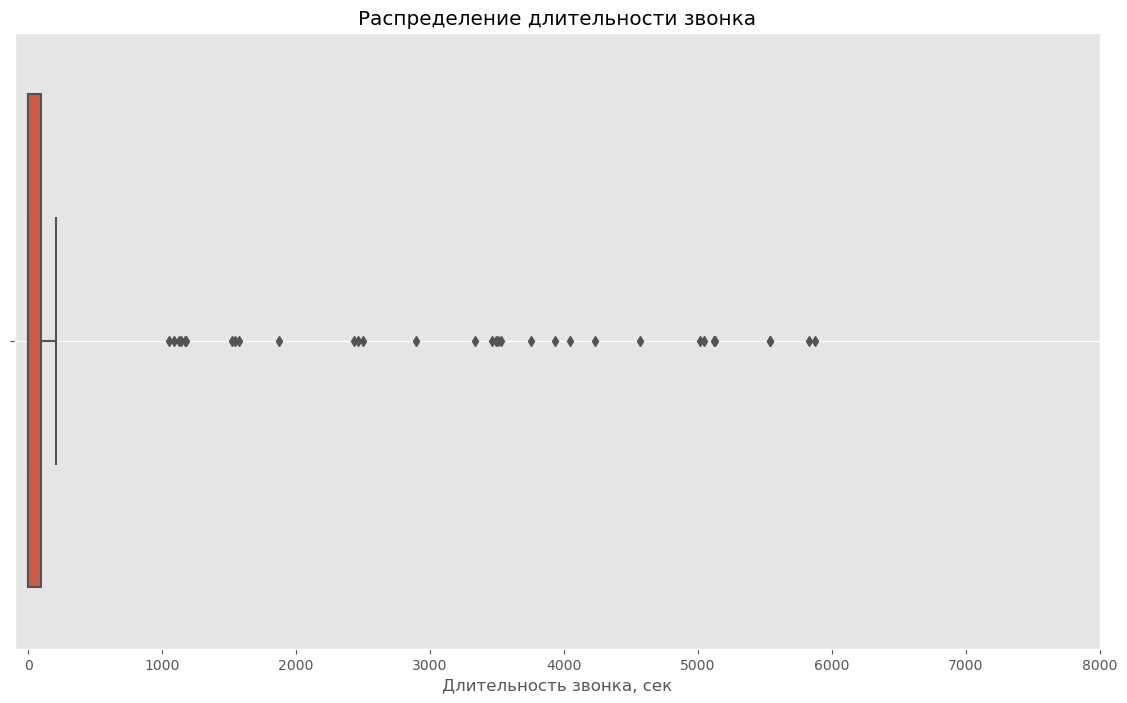

In [25]:
plt.figure(figsize=(14,8))

fig = sns.boxplot(x='duratoin_sec',
                 data=df,
                 orient='h')
fig.grid(which='both')
plt.title('Распределение длительности звонка')
plt.xlabel('Длительность звонка, сек')
fig.set(xlim=(-100,8000))        
plt.show()

Из распределения видно, что все значения длительности звонка, превышающие 250 сек будут являться выбросами, а значит стоит от них избавиться

In [26]:
df = df.query('duratoin_sec <= 250')

Просмотрим на распределение медианных значений продолжительности звонка в разрезе статуса коммуникации

In [27]:
df_call = df.groupby('hit_status_result_desc')["duratoin_sec"].median().sort_values(ascending = False)

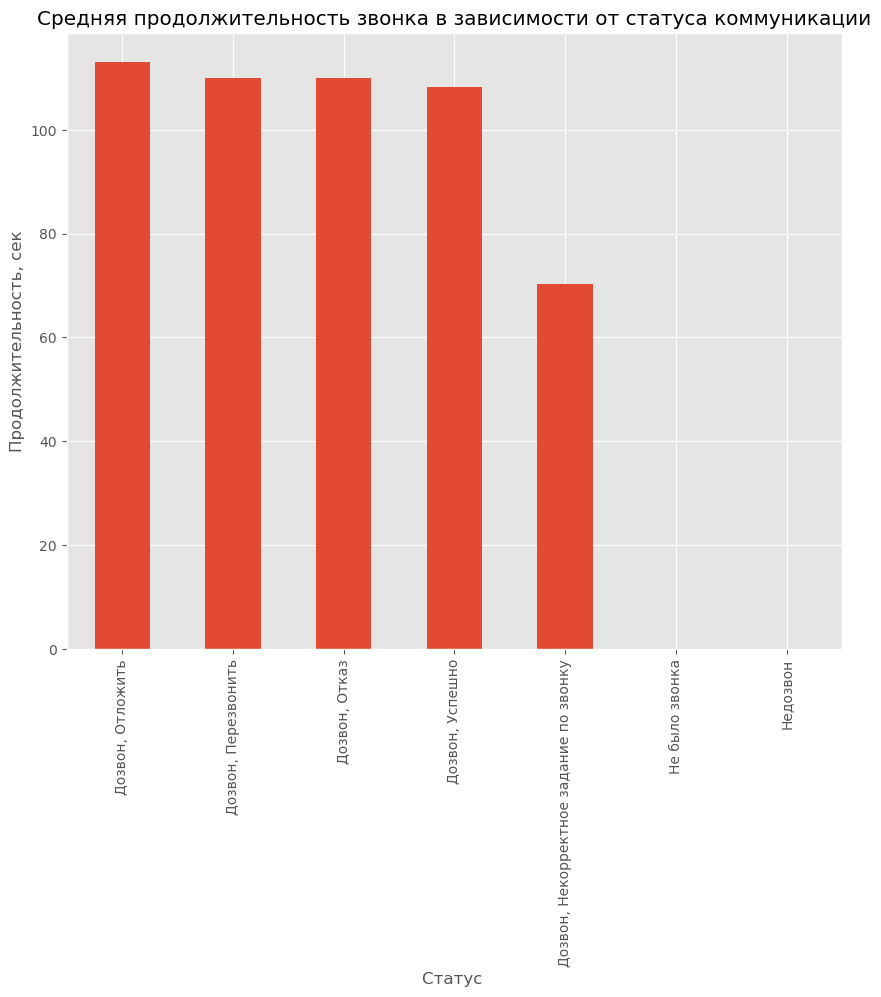

hit_status_result_desc
Дозвон, Отложить                          113.00
Дозвон, Перезвонить                       110.04
Дозвон, Отказ                             110.03
Дозвон, Успешно                           108.20
Дозвон, Некорректное задание по звонку     70.26
Не было звонка                              0.00
Недозвон                                    0.00
Name: duratoin_sec, dtype: float64

In [28]:
df_call.plot(kind='bar', figsize=(10,8))

plt.title('Средняя продолжительность звонка в зависимости от статуса коммуникации')
plt.xlabel('Статус ')
plt.ylabel('Продолжительность, сек')
plt.show()
df_call

Из сравнительного графика видно, что нулевые показатели соответствуют звонкам со статусом 'Не было звонка\Недозвон', что логично. Остальное распределение примерно равномерное, за исключением дозвона с ошибочным заданием. ДУмаю стоит удалить нулевые значения и посмотреть измениться ли график.

In [29]:
data = df.query('duratoin_sec > 0')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38489 entries, 0 to 89173
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   org_management_rk          38489 non-null  int64         
 1   management_nm              38489 non-null  object        
 2   group_nm                   38489 non-null  object        
 3   org_group_rk               38489 non-null  int64         
 4   wo_hit_rk                  38489 non-null  int64         
 5   wo_task_rk                 38489 non-null  int64         
 6   wo_employee_rk             38489 non-null  int64         
 7   wo_queue_id                38489 non-null  int64         
 8   agent_login                38489 non-null  object        
 9   finish_communication_dttm  38489 non-null  datetime64[ns]
 10  duratoin_sec               38489 non-null  float64       
 11  task_stage_id              38489 non-null  object        
 12  sour

In [31]:
data_call = data.groupby('hit_status_result_desc')["duratoin_sec"].median().sort_values(ascending = False)

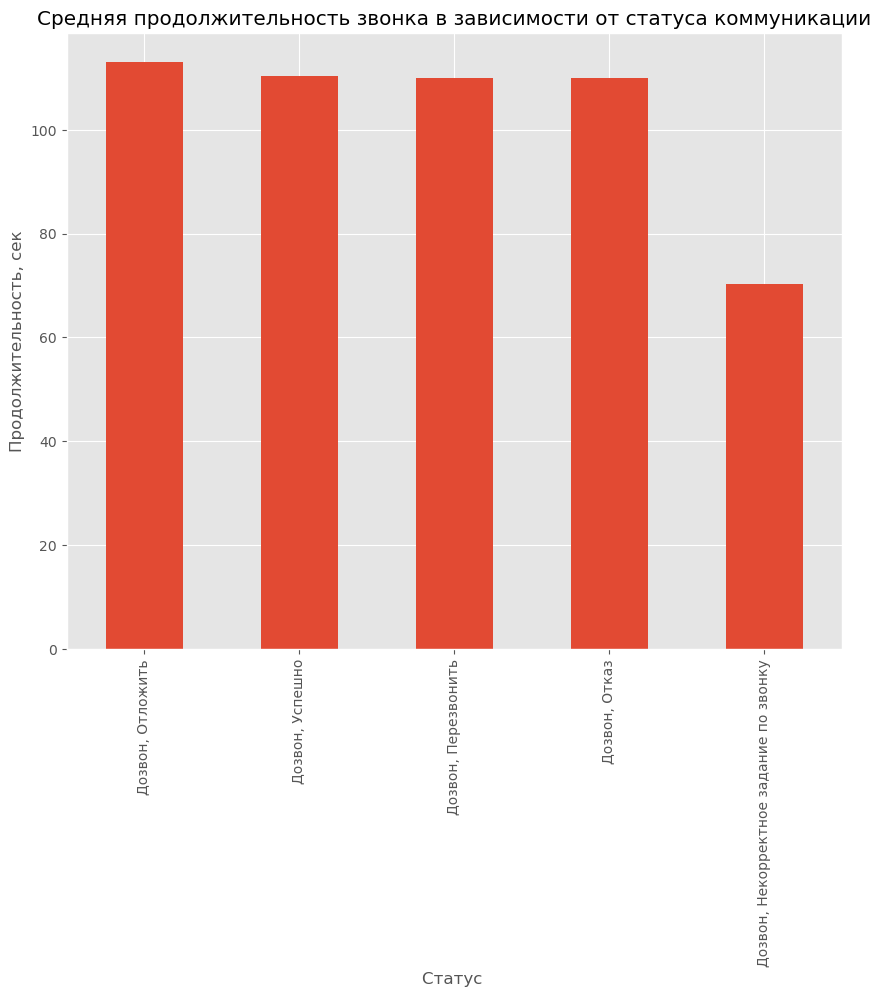

hit_status_result_desc
Дозвон, Отложить                          113.00
Дозвон, Успешно                           110.30
Дозвон, Перезвонить                       110.04
Дозвон, Отказ                             110.03
Дозвон, Некорректное задание по звонку     70.26
Name: duratoin_sec, dtype: float64

In [32]:
data_call.plot(kind='bar', figsize=(10,8))

plt.title('Средняя продолжительность звонка в зависимости от статуса коммуникации')
plt.xlabel('Статус ')
plt.ylabel('Продолжительность, сек')
plt.show()
data_call

Средняя продолжительность звонков подравнялась, однако недостаточно сильно, чтобы думать на системную ошибку, скорее всего единичное неправильное проставление статусов

## Продукт

In [58]:
df_hid = df.groupby('hid').agg({'wo_task_rk' : 'count'}) \
                                                  .sort_values(by = 'wo_task_rk', ascending = False)

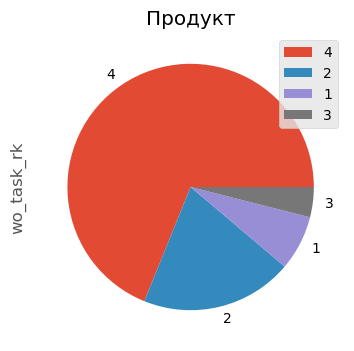

,wo_task_rk
hid,
4,61395
2,17783
1,6436
3,3526


In [68]:
plt.style.use('ggplot')

df_hid.plot(kind='pie', subplots=True, figsize=(6,4))

plt.title('Продукт')

plt.show()
df_hid

График распределения популярности продукта, из которого видно каким продуктом наиболее часто пользуются

## Взаимодействие и их успешность по агентам, группам, знаку зодиака, очереди

In [50]:
# больше всего взаимодействий
df_agent = df.groupby('agent_login')['hit_status_result_desc'].count().sort_values(ascending = False).head(20)
df_agent

agent_login
covaadru    184
enkovaab    159
levaadko    156
kinalapo    152
8857iaro    151
nayaivza    149
rovaeagu    148
0489vvvl    146
novannxo    143
kinasgsa    143
novaadtr    143
aevaomsh    142
hovarvku    141
rovaayac    140
sovaarba    140
enkovnel    139
3898avav    139
krovadmo    138
novatksu    136
eevavdev    136
Name: hit_status_result_desc, dtype: int64

In [53]:
# взаимодействие и их успешность по агентам
df_ag = pd.crosstab(df['agent_login'], df['hit_status_result_desc'])
df_ag[:10]

hit_status_result_desc,"Дозвон, Некорректное задание по звонку","Дозвон, Отказ","Дозвон, Отложить","Дозвон, Перезвонить","Дозвон, Успешно",Не было звонка,Недозвон
agent_login,,,,,,,
0018lash,0,0,0,3,2,0,3
0033makn,0,21,4,14,0,0,80
0036gkar,0,15,3,5,3,0,21
0062mgme,0,8,2,11,1,0,1
0080ovma,0,0,0,84,0,0,0
0096adch,0,6,0,4,5,0,15
0106ssso,0,7,0,4,2,0,17
0157avko,0,11,1,7,0,0,29
0171sgvl,0,1,0,2,0,0,9


In [55]:
# взаимодействие и их успешность в зависимости от знака зодиака
df_hor = pd.crosstab(df['horoscope'], df['hit_status_result_desc'])
df_hor

hit_status_result_desc,"Дозвон, Некорректное задание по звонку","Дозвон, Отказ","Дозвон, Отложить","Дозвон, Перезвонить","Дозвон, Успешно",Не было звонка,Недозвон
horoscope,,,,,,,
Близнецы,2,1398,132,1236,323,9,4194
Весы,1,1412,134,1210,224,5,3984
Водолей,2,1135,91,1109,197,16,3583
Дева,10,7475,717,5897,1392,53,19444
Козерог,2,572,43,545,87,3,2005
Лев,0,285,23,203,44,4,759
Овен,0,973,53,874,193,1,3197
Рак,1,1579,136,1201,234,14,4200
Рыбы,4,973,82,833,142,5,3020


In [65]:
# взаимодействие и их успешность в зависимости от очереди
df_que = pd.crosstab(df['queue_desc'], df['hit_status_result_desc'])
df_que

hit_status_result_desc,"Дозвон, Некорректное задание по звонку","Дозвон, Отказ","Дозвон, Отложить","Дозвон, Перезвонить","Дозвон, Успешно",Не было звонка,Недозвон
queue_desc,,,,,,,
Очередь 1,0,36,16,21,67,0,132
Очередь 10,0,0,0,0,0,0,1
Очередь 100,0,12,0,18,11,1,50
Очередь 101,0,13,7,4,2,0,9
Очередь 102,0,1,0,1,0,0,5
...,...,...,...,...,...,...,...
Очередь 95,0,1,0,1,1,0,3
Очередь 96,0,32,3,42,24,0,116
Очередь 97,0,105,1,58,9,0,268


In [76]:
# взаимодействие и их успешность в зависимости от группы
df_grp = pd.crosstab(df['group_nm'], df['hit_status_result_desc'])
df_grp

hit_status_result_desc,"Дозвон, Некорректное задание по звонку","Дозвон, Отказ","Дозвон, Отложить","Дозвон, Перезвонить","Дозвон, Успешно",Не было звонка,Недозвон
group_nm,,,,,,,
Группа 1,0,298,5,213,55,0,853
Группа 10,0,47,9,82,6,1,2
Группа 11,1,99,2,70,7,0,313
Группа 12,0,20,5,18,4,0,22
Группа 13,0,427,95,242,153,0,1291
Группа 14,0,167,7,85,11,0,178
Группа 15,0,286,170,150,127,4,1094
Группа 16,0,328,40,314,29,0,133
Группа 17,5,116,0,187,257,1,868
